# Actividad Práctica 1: Álgebra Lineal con NumPy

## Objetivos de la Actividad

- Familiarizarse con la creación y manipulación de vectores y matrices utilizando NumPy.
- Realizar operaciones básicas de álgebra lineal: suma, resta, multiplicación, transposición.
- Implementar operaciones matriciales más avanzadas, como la descomposición en valores singulares (SVD).
- Aplicar estos conceptos en un contexto que simule datos reales.

## Parte 1: Vectores y Operaciones Básicas

In [1]:
import numpy as np

# Crea dos vectores v1 y v2 de tamaño 3 con valores numéricos.

v1 = np.array([1, 5, 3])
v2 = np.array([4, 7, 2])

### Suma de vectores

In [2]:
suma = v1 + v2
print("Suma de v1 y v2:", suma)

Suma de v1 y v2: [ 5 12  5]



### Resta de Vectores



In [3]:
resta = v1 - v2
print("Resta de v1 y v2:", resta)


Resta de v1 y v2: [-3 -2  1]


### Producto Elemento a Elemento



In [4]:
producto_elemento = v1 * v2
print("Producto elemento a elemento de v1 y v2:", producto_elemento)


Producto elemento a elemento de v1 y v2: [ 4 35  6]


### Producto Punto (Dot Product)



In [5]:
producto_punto = np.dot(v1, v2)
print("Producto punto de v1 y v2:", producto_punto)


Producto punto de v1 y v2: 45


### Norma de un Vector



In [6]:
norma_v1 = np.linalg.norm(v1)
print("Norma de v1:", norma_v1)


Norma de v1: 5.916079783099616


**Explicaciones:**

- Suma y Resta: Operaciones elemento a elemento entre vectores del mismo tamaño.
- Producto Elemento a Elemento: Multiplica cada componente correspondiente de los vectores.
- Producto Punto: Operación escalar que resulta de multiplicar componentes correspondientes y sumar los productos.
- Norma: Medida de la longitud o magnitud del vector.

## Matrices y Operaciones Matriciales


In [7]:
# Crea dos matrices A (3x3) y B (3x3) con valores numéricos.

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])


### Suma de Matrices



In [8]:
suma_matrices = A + B
print("Suma de A y B:\n", suma_matrices)


Suma de A y B:
 [[10 10 10]
 [10 10 10]
 [10 10 10]]


### Resta de Matrices



In [9]:
resta_matrices = A - B
print("Resta de A y B:\n", resta_matrices)


Resta de A y B:
 [[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]


### Multiplicación Matricial



In [10]:
multiplicacion_matricial = np.dot(A, B)
print("Multiplicación matricial de A y B:\n", multiplicacion_matricial)


Multiplicación matricial de A y B:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


### Transpuesta de una Matriz



In [11]:
transpuesta_A = A.T
print("Transpuesta de A:\n", transpuesta_A)


Transpuesta de A:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Explicaciones:**

- Suma y Resta de Matrices: Operaciones elemento a elemento entre matrices de las mismas dimensiones.
- Multiplicación Matricial (Producto de Matrices): Combina filas de la primera matriz con columnas de la segunda.
- Transpuesta: Intercambia filas por columnas en la matriz.

## Descomposición Matricial

In [12]:
# Realiza la descomposición SVD de la matriz A.

U, S, VT = np.linalg.svd(A)
print("Matriz U:\n", U)
print("Valores singulares S:\n", S)
print("Matriz V transpuesta:\n", VT)


Matriz U:
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Valores singulares S:
 [1.68481034e+01 1.06836951e+00 3.33475287e-16]
Matriz V transpuesta:
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


### Reconstrucción de la Matriz Original

In [13]:
# Convertir S a una matriz diagonal
S_matriz = np.diag(S)

# Reconstruir A
A_reconstruida = np.dot(U, np.dot(S_matriz, VT))
print("Matriz A reconstruida:\n", A_reconstruida)


Matriz A reconstruida:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


**Explicaciones:**

- Descomposición SVD:
    - U: Matriz ortogonal de la izquierda.
    - S: Vector de valores singulares (se convierte en una matriz diagonal).
    - VT: Matriz ortogonal de la derecha transpuesta.
- Reconstrucción: Al multiplicar U, S y VT, deberíamos obtener la matriz original (o muy cercana, considerando precisión numérica).

### Aplicación Práctica - Compresión de Imágenes

Utiliza una imagen en escala de grises y cárgala como una matriz.

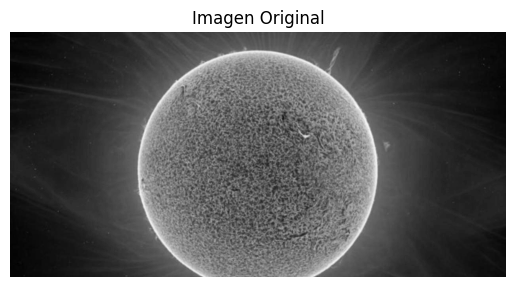

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Cargar la imagen
imagen = imread('image_converted.jpg')

# Si la imagen es en color, convertirla a escala de grises
if len(imagen.shape) == 3:
    imagen = np.mean(imagen, axis=2)

# Mostrar la imagen original
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()


Realiza la descomposición SVD de la imagen y reconstruye la imagen usando un número reducido de valores singulares.

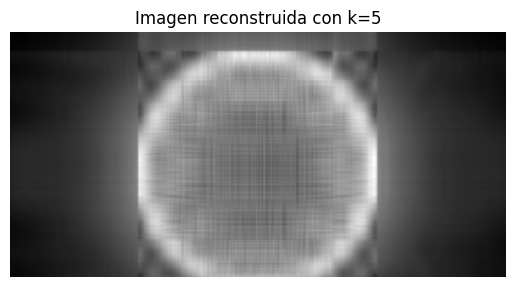

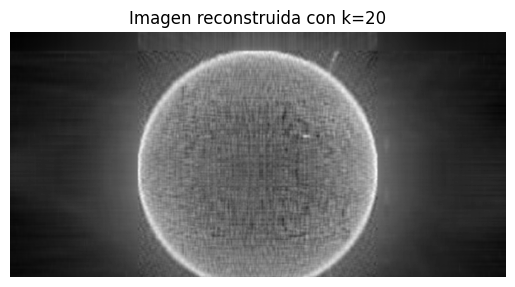

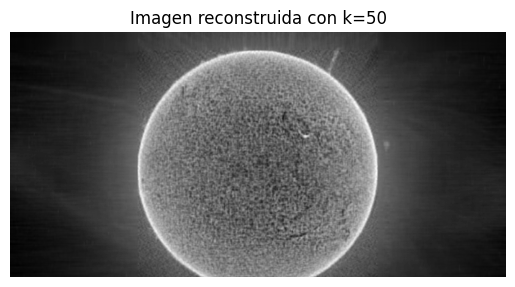

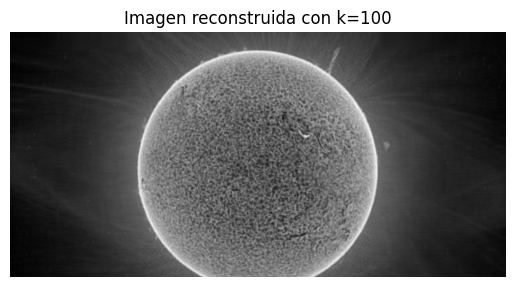

In [31]:
# Realizar SVD
U, S, VT = np.linalg.svd(imagen, full_matrices=False)

# Función para reconstruir la imagen con k componentes
def reconstruir_imagen(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    imagen_reconstruida = np.dot(U_k, np.dot(S_k, VT_k))
    return imagen_reconstruida

# Reconstruir la imagen con diferentes valores de k
ks = [5, 20, 50, 100]

for k in ks:
    imagen_k = reconstruir_imagen(U, S, VT, k)
    plt.imshow(imagen_k, cmap='gray')
    plt.title(f'Imagen reconstruida con k={k}')
    plt.axis('off')
    plt.show()


Calcula la proporción de compresión y discute la pérdida de calidad visual.

In [32]:
for k in ks:
    tamaño_original = imagen.size
    tamaño_comprimido = k * (U.shape[0] + VT.shape[1] + 1)
    proporción_compresión = tamaño_comprimido / tamaño_original * 100
    print(f'Para k={k}, el tamaño es {proporción_compresión:.2f}% del original')


Para k=5, el tamaño es 1.21% del original
Para k=20, el tamaño es 4.82% del original
Para k=50, el tamaño es 12.05% del original
Para k=100, el tamaño es 24.10% del original


**Explicaciones:**

- Compresión de Imágenes con SVD:
    - Al conservar solo los primeros k valores singulares, podemos aproximar la imagen original con menos datos.
    - Esto resulta en una compresión, ya que almacenamos menos información.
- Impacto en la Calidad:
    - A medida que k aumenta, la calidad de la imagen reconstruida mejora.
    - Existe un compromiso entre la compresión y la calidad.

**Notas:**

- Imágenes de Prueba:
    - Puedes utilizar imágenes públicas o generar matrices aleatorias para simular imágenes.
- Librerías Necesarias:
    - Asegúrate de tener instaladas las librerías matplotlib y numpy.

# Actividad Práctica 2: Cálculo y Probabilidad con Python

**Objetivos de la Actividad**

- Entender y calcular derivadas y gradientes numéricamente.
- Explorar distribuciones de probabilidad y generar datos aleatorios.
- Aplicar el Teorema de Bayes en un problema práctico.
- Utilizar librerías como NumPy, SciPy y Pandas para análisis estadístico.

## Cálculo de Derivadas y Gradientes

**Aproximación Numérica de Derivadas**

Implementa una función para calcular la derivada numérica de una función escalar.

In [33]:
def derivada_numerica(f, x, h=1e-5): # h es el incremento
    return (f(x + h) - f(x - h)) / (2 * h) # f(x + h) es la función evaluada en x + h

# Función a derivar
def f(x):
    return x**3 + 2*x**2 + x # f(x) es la función a derivar

# Punto donde evaluar la derivada
x0 = 1.0
derivada = derivada_numerica(f, x0)
print(f"La derivada de f(x) en x={x0} es aproximadamente {derivada}")


La derivada de f(x) en x=1.0 es aproximadamente 8.000000000119023


## Visualización de la Derivada

Grafica la función y su derivada en un rango de valores.


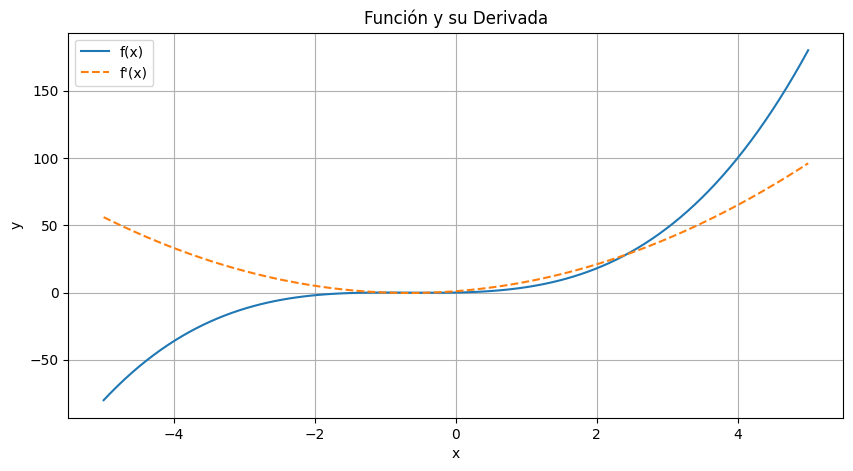

In [36]:
import matplotlib.pyplot as plt


x_vals = np.linspace(-5, 5, 100) # 100 puntos entre -5 y 5
f_vals = f(x_vals) # evaluamos la función en los puntos
derivada_vals = derivada_numerica(f, x_vals) # evaluamos la derivada en los puntos

plt.figure(figsize=(10, 5)) # creamos una figura
plt.plot(x_vals, f_vals, label='f(x)') # graficamos la función
plt.plot(x_vals, derivada_vals, label="f'(x)", linestyle='--') # graficamos la derivada
plt.title('Función y su Derivada') # título
plt.xlabel('x') # etiqueta del eje x
plt.ylabel('y') # etiqueta del eje y
plt.legend() # leyenda
plt.grid(True) # grid
plt.show() # mostramos la gráfica


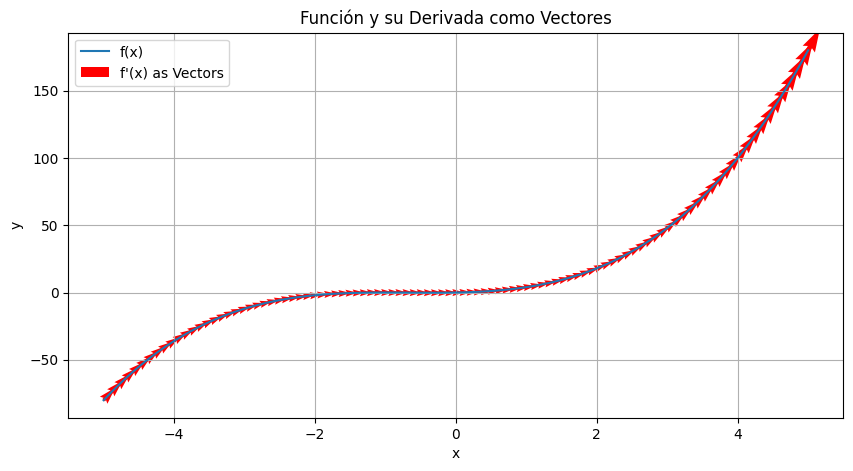

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y la derivada numérica
def f(x):
    return x**3 + 2*x**2 + x

def derivada_numerica(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Valores de x
x_vals = np.linspace(-5, 5, 100)
f_vals = f(x_vals)
derivada_vals = derivada_numerica(f, x_vals)

# Creamos la figura y graficamos
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label='f(x)')
plt.quiver(x_vals, f_vals, np.ones_like(x_vals), derivada_vals, angles='xy', scale_units='xy', scale=6, color='red', label="f'(x) as Vectors") # graficamos la derivada como vectores
plt.title('Función y su Derivada como Vectores')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Explicaciones:**

- Derivada Numérica:
Utiliza diferencias finitas para aproximar la derivada de una función en un punto.
- Visualización:
Ayuda a entender cómo cambia la función y su tasa de cambio en diferentes puntos.

## Distribuciones de Probabilidad

Genera muestras aleatorias de diferentes distribuciones y visualízalas.

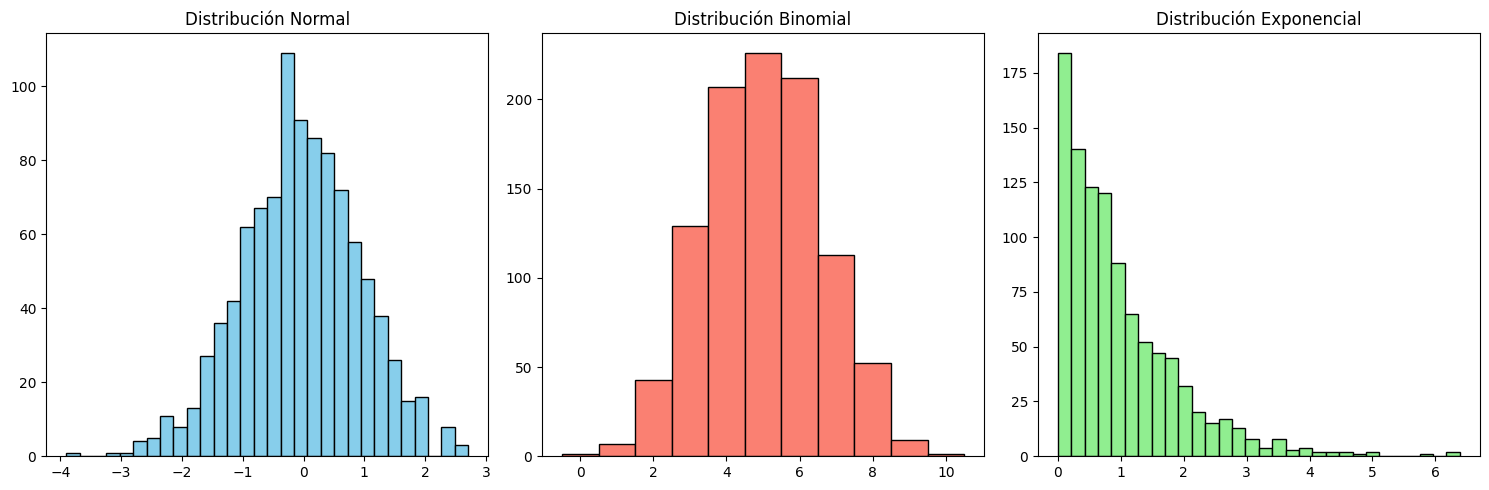

In [43]:
import scipy.stats as stats

# Distribución Normal
mu, sigma = 0, 1  # media y desviación estándar
datos_normal = np.random.normal(mu, sigma, 1000)

# Distribución Binomial
n, p = 10, 0.5  # número de ensayos y probabilidad de éxito
datos_binomial = np.random.binomial(n, p, 1000)

# Distribución Exponencial
lambda_param = 1
datos_exponencial = np.random.exponential(1/lambda_param, 1000)

# Visualización
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma Normal
axs[0].hist(datos_normal, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución Normal')

# Histograma Binomial
axs[1].hist(datos_binomial, bins=range(0, n+2), color='salmon', edgecolor='black', align='left')
axs[1].set_title('Distribución Binomial')

# Histograma Exponencial
axs[2].hist(datos_exponencial, bins=30, color='lightgreen', edgecolor='black')
axs[2].set_title('Distribución Exponencial')

plt.tight_layout()
plt.show()


**Explicaciones:**

- Distribución Normal: Comúnmente usada en estadísticas; muchos fenómenos naturales siguen esta distribución.
- Distribución Binomial: Modelo de ensayos con dos posibles resultados (éxito o fracaso).
- Distribución Exponencial: Modela el tiempo entre eventos en un proceso de Poisson.

## Aplicación del Teorema de Bayes

En una población, el 2% de las personas tienen una enfermedad.
Una prueba diagnóstica tiene:

- Sensibilidad (verdaderos positivos): 95%
- Especificidad (verdaderos negativos): 90%

Pregunta: Si una persona obtiene un resultado positivo, ¿cuál es la probabilidad de que realmente tenga la enfermedad?

In [44]:
# Datos
P_Enfermedad = 0.02
P_NoEnfermedad = 1 - P_Enfermedad
P_Positivo_Enfermedad = 0.95  # Sensibilidad
P_Positivo_NoEnfermedad = 1 - 0.90  # 1 - Especificidad

# Aplicación del Teorema de Bayes
P_Enfermedad_Positivo = (P_Positivo_Enfermedad * P_Enfermedad) / (
    P_Positivo_Enfermedad * P_Enfermedad + P_Positivo_NoEnfermedad * P_NoEnfermedad
)

print(f"La probabilidad de tener la enfermedad dado un resultado positivo es: {P_Enfermedad_Positivo:.2%}")


La probabilidad de tener la enfermedad dado un resultado positivo es: 16.24%


**Resultado:**
- Salida esperada:

La probabilidad es aproximadamente 16%.

**Explicaciones:**
- Teorema de Bayes:

Permite actualizar la probabilidad de un evento basado en nueva información.
Interpretación:

A pesar de la alta sensibilidad y especificidad, la baja prevalencia de la enfermedad afecta la probabilidad final.

## Estadística Descriptiva con Pandas

Cargar un Conjunto de Datos: Utiliza el conjunto de datos "Titanic" disponible en Seaborn.

In [45]:
import pandas as pd
import seaborn as sns

# Cargar datos
df = sns.load_dataset('titanic')

# Mostrar las primeras filas
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Análisis Estadístico Básico

**Medidas de Tendencia Central y Dispersión**

In [46]:
# Edad
media_edad = df['age'].mean()
mediana_edad = df['age'].median()
desviacion_edad = df['age'].std()
print(f"Edad - Media: {media_edad:.2f}, Mediana: {mediana_edad:.2f}, Desviación estándar: {desviacion_edad:.2f}")


Edad - Media: 29.70, Mediana: 28.00, Desviación estándar: 14.53


**Distribución de Supervivientes por Género**



In [47]:
supervivencia_genero = df.groupby('sex')['survived'].mean()
print("Tasa de supervivencia por género:\n", supervivencia_genero)


Tasa de supervivencia por género:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


### Visualizaciones

**Histograma de Edades**



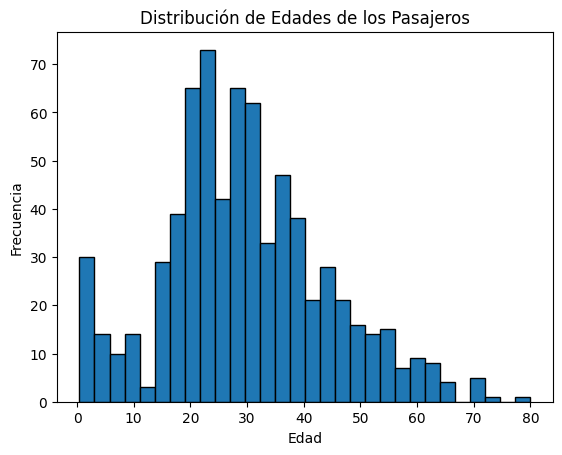

In [48]:
plt.hist(df['age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


**Gráfico de Barras de Supervivencia por Clase**



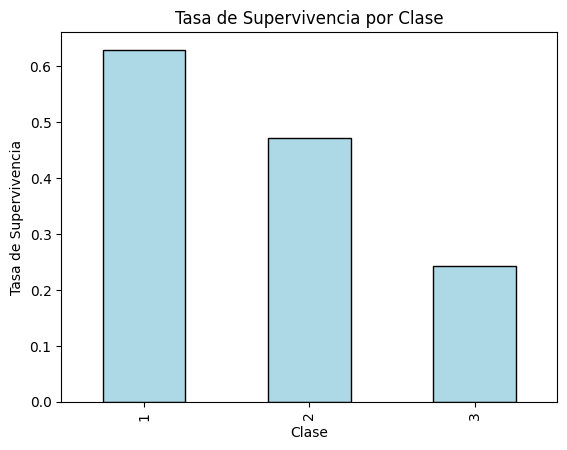

In [49]:
supervivencia_clase = df.groupby('pclass')['survived'].mean()
supervivencia_clase.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia')
plt.show()


**Explicaciones:**

- Análisis Descriptivo:
Proporciona una visión general de las características principales de los datos.
- Visualizaciones:
Ayudan a identificar patrones y tendencias que pueden no ser evidentes en tablas.

### Pruebas Estadísticas con SciPy

Realiza una prueba t para comparar las edades de los pasajeros que sobrevivieron y los que no.

In [50]:
from scipy import stats

# Separar edades de sobrevivientes y no sobrevivientes
edad_supervivientes = df[df['survived'] == 1]['age'].dropna()
edad_no_supervivientes = df[df['survived'] == 0]['age'].dropna()

# Prueba t de muestras independientes
t_stat, p_value = stats.ttest_ind(edad_supervivientes, edad_no_supervivientes) # t_stat es el estadístico t y p_value es el valor p 

print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")


Estadístico t: -2.0667, Valor p: 0.0391


**Interpretación:**

- Hipótesis Nula (H0):
No hay diferencia significativa en las edades entre sobrevivientes y no sobrevivientes.

- Conclusión:
Si el valor p es menor que el nivel de significancia (por ejemplo, 0.05), se rechaza H0.